# Introduction

**Author :** Rutendo F. Sigauke

**Input  :** 
1. Annotation files (RefSeq and Genes)
2. Overlap bed files between mumerged bidirectionals and genome features

**Output :**

Figures

## Summary of methods

Here regions of bidirectional transcription as called by dREG and Tfit are overlapped with RefSeq gene annotations from NCBI (`mm10_p6` and `hg38_p14`). The features overlapped include all transcript `promoters`(1kb upstream on TSS), `exons`,`intron` and `intergenic regions`. For the 50% or 60% overlaps, if a bidirectional overlapped a feature, it was only counted once as indicated by the `-u` flag.

The script used to generate the overlaps is `06_master_mumerge_overlap_genome_features.sbatch`. The bidirectional transcript regions that overlap features are reported (either unique or all overlaps with number of base pairs covered).


## Script 

```sh

#!/bin/bash

#SBATCH --job-name=overlaps_mumerged_bidirs_with_genome_features
#SBATCH --output=/scratch/Users/rusi2317/e_and_o/%x_%j.out
#SBATCH --error=/scratch/Users/rusi2317/e_and_o/%x_%j.err
#SBATCH --time=00:05:00
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --mem=50MB
#SBATCH --partition short
#SBATCH --mail-type=FAIL
#SBATCH --mail-user=rutendo.sigauke@cuanschutz.edu

module purge

###########################################
##initialize files                       ## 
###########################################
wd=/scratch/Users/rusi2317/projects/master_mumerge/processed_data
mm10_features=/scratch/Shares/dowell/genomes/mm10/ncbi
hg38_features=/scratch/Shares/dowell/genomes/hg38/ncbi 
mumerge=/scratch/Shares/dowell/dbnascent/out/meta_analysis/mumerge/bidirectionals_dreg_tfit
hg38_mumerge=${mumerge}/hg38_tfit_dreg_bidirectionals.bed
mm10_mumerge=${mumerge}/mm10_tfit_dreg_bidirectionals.bed
out=${wd}/genome_overlap

mkdir -p ${out}

###########################################
##Get number ofr bidirectionals          ##
##that overlap the following features    ##
##intergenic, intronic, promoter, exonic ##
###########################################

##human annotations
for feature in `ls ${hg38_features} | grep ".bed" | grep 'intergenic\|introns\|promoters\|exons'`; do

    bedtools intersect -a ${hg38_mumerge} -b ${hg38_features}/${feature} -wa -u -f 0.5 > ${out}/${feature}.mumerge_overlap50perc.bed
    bedtools intersect -a ${hg38_mumerge} -b ${hg38_features}/${feature} -wa -u -f 0.6 > ${out}/${feature}.mumerge_overlap60perc.bed
    bedtools intersect -a ${hg38_mumerge} -b ${hg38_features}/${feature} -wa -u > ${out}/${feature}.mumerge_overlap.bed
    bedtools intersect -a ${hg38_mumerge} -b ${hg38_features}/${feature} -wa > ${out}/${feature}.mumerge_overlapReportAll.bed
    bedtools intersect -a ${hg38_mumerge} -b ${hg38_features}/${feature} -wo > ${out}/${feature}.mumerge_overlapReportAll_bp.bed
    
done 

##mouse annotations
for feature in `ls ${mm10_features} | grep ".bed" | grep 'intergenic\|introns\|promoters\|exons'`; do
    bedtools intersect -a ${mm10_mumerge} -b ${mm10_features}/${feature} -wa -u -f 0.5 > ${out}/${feature}.mumerge_overlap50perc.bed
    bedtools intersect -a ${mm10_mumerge} -b ${mm10_features}/${feature} -wa -u -f 0.6 > ${out}/${feature}.mumerge_overlap60perc.bed
    bedtools intersect -a ${mm10_mumerge} -b ${mm10_features}/${feature} -wa -u > ${out}/${feature}.mumerge_overlap.bed
    bedtools intersect -a ${mm10_mumerge} -b ${mm10_features}/${feature} -wa > ${out}/${feature}.mumerge_overlapReportAll.bed
    bedtools intersect -a ${mm10_mumerge} -b ${mm10_features}/${feature} -wo > ${out}/${feature}.mumerge_overlapReportAll_bp.bed
    
done 


```

# Library loads

In [1]:
library(data.table) # easy import of large tables
library(ggplot2)    # plotting
library(cowplot)    # plotting
library(scales)     # plotting
library(ggvenn)       ## plot venn digram
library(VennDiagram)  ## plot venn diagram

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

Loading required package: futile.logger



# Summary of overlaps

## hg38

```sh

rusi2317@fiji-2.colorado.edu$ wc -l hg38_refseq_*
    38380 hg38_refseq_exons.bed.mumerge_overlap50perc.bed
    31344 hg38_refseq_exons.bed.mumerge_overlap60perc.bed
    99481 hg38_refseq_exons.bed.mumerge_overlap.bed
   399047 hg38_refseq_exons.bed.mumerge_overlapReportAll.bed
   399047 hg38_refseq_exons.bed.mumerge_overlapReportAll_bp.bed
   319058 hg38_refseq_intergenic.bed.mumerge_overlap50perc.bed
   318363 hg38_refseq_intergenic.bed.mumerge_overlap60perc.bed
   322329 hg38_refseq_intergenic.bed.mumerge_overlap.bed
   322329 hg38_refseq_intergenic.bed.mumerge_overlapReportAll.bed
   322329 hg38_refseq_intergenic.bed.mumerge_overlapReportAll_bp.bed
   459907 hg38_refseq_introns.bed.mumerge_overlap50perc.bed
   450557 hg38_refseq_introns.bed.mumerge_overlap60perc.bed
   482632 hg38_refseq_introns.bed.mumerge_overlap.bed
  2406992 hg38_refseq_introns.bed.mumerge_overlapReportAll.bed
  2406992 hg38_refseq_introns.bed.mumerge_overlapReportAll_bp.bed
    26728 hg38_refseq_promoters.bed.mumerge_overlap50perc.bed
    22425 hg38_refseq_promoters.bed.mumerge_overlap60perc.bed
    33365 hg38_refseq_promoters.bed.mumerge_overlap.bed
    95469 hg38_refseq_promoters.bed.mumerge_overlapReportAll.bed
    95469 hg38_refseq_promoters.bed.mumerge_overlapReportAll_bp.bed
```

## mm10

```sh

rusi2317@fiji-2.colorado.edu$ wc -l mm10_refseq_*
    31087 mm10_refseq_exons.bed.mumerge_overlap50perc.bed
    25467 mm10_refseq_exons.bed.mumerge_overlap60perc.bed
    79511 mm10_refseq_exons.bed.mumerge_overlap.bed
   164219 mm10_refseq_exons.bed.mumerge_overlapReportAll.bed
   164219 mm10_refseq_exons.bed.mumerge_overlapReportAll_bp.bed
   286219 mm10_refseq_intergenic.bed.mumerge_overlap50perc.bed
   285572 mm10_refseq_intergenic.bed.mumerge_overlap60perc.bed
   289376 mm10_refseq_intergenic.bed.mumerge_overlap.bed
   289376 mm10_refseq_intergenic.bed.mumerge_overlapReportAll.bed
   289376 mm10_refseq_intergenic.bed.mumerge_overlapReportAll_bp.bed
   330705 mm10_refseq_introns.bed.mumerge_overlap50perc.bed
   323918 mm10_refseq_introns.bed.mumerge_overlap60perc.bed
   350863 mm10_refseq_introns.bed.mumerge_overlap.bed
   815730 mm10_refseq_introns.bed.mumerge_overlapReportAll.bed
   815730 mm10_refseq_introns.bed.mumerge_overlapReportAll_bp.bed
    22605 mm10_refseq_promoters.bed.mumerge_overlap50perc.bed
    18476 mm10_refseq_promoters.bed.mumerge_overlap60perc.bed
    28929 mm10_refseq_promoters.bed.mumerge_overlap.bed
    50187 mm10_refseq_promoters.bed.mumerge_overlapReportAll.bed
    50187 mm10_refseq_promoters.bed.mumerge_overlapReportAll_bp.bed

```

# Load samples

## Overlap tables

In [2]:
genome_overlap <- '/Users/rusi2317/projects/master_mumerge/processed_data/genome_overlap'

genome_overlap_path <- list.files(path=genome_overlap, 
                              pattern="bed$",full.names=TRUE)
head(genome_overlap_path)

[1] "/Users/rusi2317/projects/master_mumerge/processed_data/genome_overlap/hg38_refseq_exons.bed.mumerge_overlap.bed"            
[2] "/Users/rusi2317/projects/master_mumerge/processed_data/genome_overlap/hg38_refseq_exons.bed.mumerge_overlap50perc.bed"      
[3] "/Users/rusi2317/projects/master_mumerge/processed_data/genome_overlap/hg38_refseq_exons.bed.mumerge_overlap60perc.bed"      
[4] "/Users/rusi2317/projects/master_mumerge/processed_data/genome_overlap/hg38_refseq_exons.bed.mumerge_overlapReportAll_bp.bed"
[5] "/Users/rusi2317/projects/master_mumerge/processed_data/genome_overlap/hg38_refseq_exons.bed.mumerge_overlapReportAll.bed"   
[6] "/Users/rusi2317/projects/master_mumerge/processed_data/genome_overlap/hg38_refseq_intergenic.bed.mumerge_overlap.bed"

In [3]:
genome_overlap_DT <- lapply(genome_overlap_path, data.table::fread)
dim(genome_overlap_DT[[1]])
head(genome_overlap_DT[[1]], 3)

[1] 99481     6

V1,V2,V3,V4,V5,V6
<chr>,<int>,<int>,<chr>,<int>,<chr>
chr1,12182,12456,"tfit,dreg",1,.
chr1,13264,13506,tfit,14,.
chr1,14655,14811,"tfit,dreg",14,.


In [4]:
hg38_exons <- genome_overlap_DT[[4]]
hg38_exons$bidir_width <- hg38_exons$V3-hg38_exons$V2 +1
hg38_exons$exon_width <- hg38_exons$V9-hg38_exons$V8 +1
hg38_exons$bidir_perc <- (hg38_exons$V13/hg38_exons$bidir_width)*100
head(hg38_exons, 3)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,bidir_width,exon_width,bidir_perc
<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
chr1,12182,12456,"tfit,dreg",1,.,chr1,11873,12227,DDX11L1:NR_046018.2,.,+,45,275,355,16.36364
chr1,13264,13506,tfit,14,.,chr1,13220,14409,DDX11L1:NR_046018.2,.,+,242,243,1190,99.58848
chr1,14655,14811,"tfit,dreg",14,.,chr1,14361,14829,WASH7P:NR_024540.1,.,-,156,157,469,99.36306


In [5]:
print("Fraction of overlaps")
print(paste0("Max = ", as.character(max(hg38_exons$bidir_perc))))
print(paste0("Min = ", as.character(min(hg38_exons$bidir_perc))))

[1] "Fraction of overlaps"
[1] "Max = 99.9598876855195"
[1] "Min = 0.0655737704918033"


[1] "Histogram with fraction of overlaps in exons"


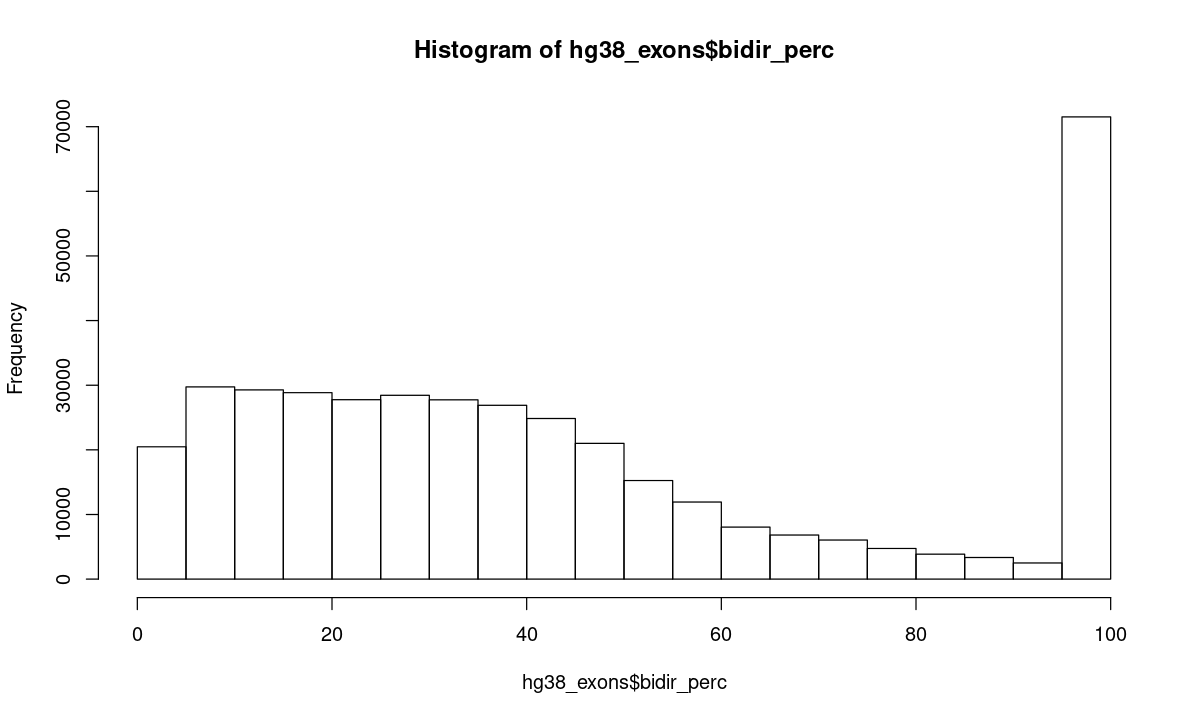

In [6]:
options(repr.plot.width=10, repr.plot.height=6)
print("Histogram with fraction of overlaps in exons")
hist(hg38_exons$bidir_perc)

[1] "Filter to get regions greater tha 50%"


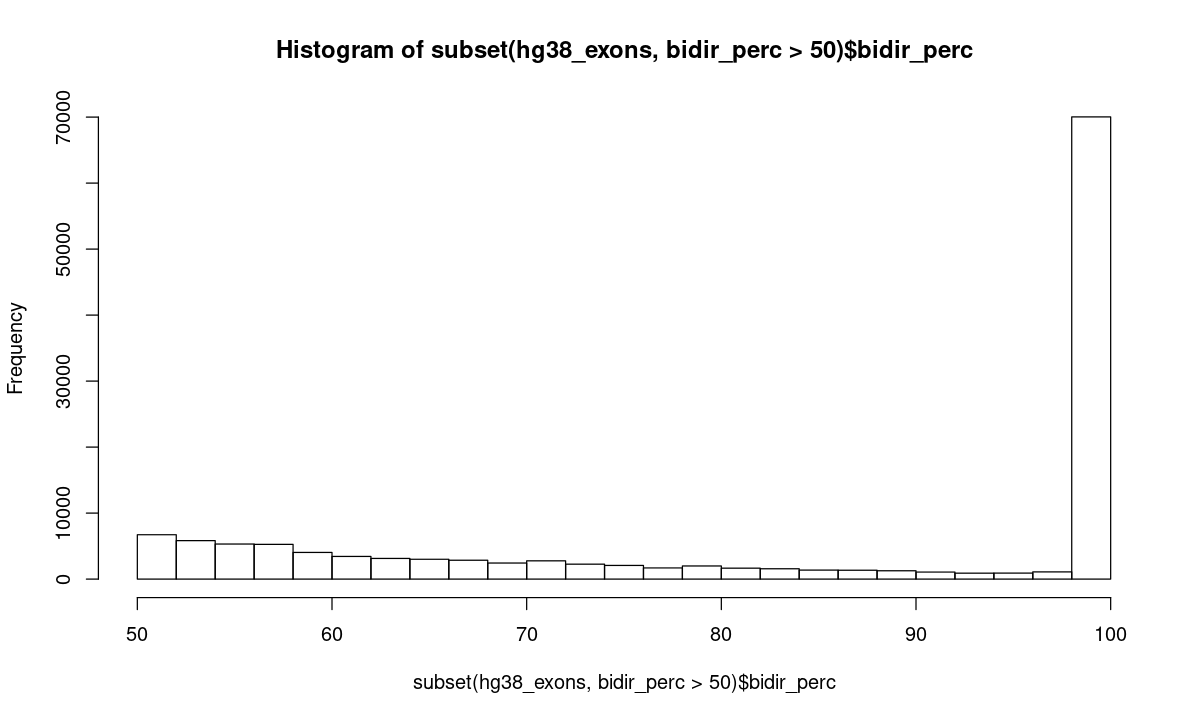

In [7]:
options(repr.plot.width=10, repr.plot.height=6)
print("Filter to get regions greater tha 50%")
hist(subset(hg38_exons, bidir_perc> 50)$bidir_perc)

In [8]:
print("Get number of overlaps (1) All >50% (2) Unique bidirectiobals > 50% (3) Unique bidirectiobals > 60%")
nrow(subset(hg38_exons, bidir_perc> 50))
nrow(unique(subset(hg38_exons, bidir_perc>= 50)[,c(1:4)]))
nrow(unique(subset(hg38_exons, bidir_perc>= 60)[,c(1:4)])) #31344

[1] "Get number of overlaps (1) All >50% (2) Unique bidirectiobals > 50% (3) Unique bidirectiobals > 60%"


[1] 134046

[1] 38070

[1] 31224

## Transcript annotations

### hg38

In [9]:
##bidirectional annotations
hg38_bidirs <- data.table::fread("/scratch/Shares/dowell/dbnascent/out/meta_analysis/mumerge/bidirectionals_dreg_tfit/hg38_tfit_dreg_bidirectionals.bed")
colnames(hg38_bidirs) <- c("chrom","start","stop","id","score","strand")
hg38_bidirs$width <- hg38_bidirs$stop - hg38_bidirs$start + 1
hg38_bidirs$type <- "Bidirectional"
dim(hg38_bidirs)
head(hg38_bidirs, 3)

[1] 847521      8

chrom,start,stop,id,score,strand,width,type
<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>
chr1,3917,4919,dreg,14,.,1003,Bidirectional
chr1,5632,6042,dreg,14,.,411,Bidirectional
chr1,6132,6486,dreg,7,.,355,Bidirectional


In [10]:
##gene transcript annotations
hg38_refseq_all <- data.table::fread("/scratch/Shares/dowell/genomes/hg38/ncbi/hg38_refseq_transcripts.bed")
colnames(hg38_refseq_all) <- c("chrom","start","stop","id","score","strand")
hg38_refseq <- hg38_refseq_all[hg38_refseq_all$chrom %in% c(paste0('chr', seq(1:22)),"chrX","chrY"),]
hg38_refseq$width <- hg38_refseq$stop - hg38_refseq$start + 1
hg38_refseq$type <- "RefSeq"
dim(hg38_refseq)
head(hg38_refseq, 3)

[1] 87314     8

chrom,start,stop,id,score,strand,width,type
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
chr1,11873,14409,DDX11L1:NR_046018.2,.,+,2537,RefSeq
chr1,14361,29370,WASH7P:NR_024540.1,.,-,15010,RefSeq
chr1,17368,17436,MIR6859-1:NR_106918.1,.,-,69,RefSeq


In [11]:
##combine gene and bidirectional transcripts
hg38_transcripts <- rbind(hg38_refseq, hg38_bidirs)
dim(hg38_transcripts)

[1] 934835      8

### mm10

In [12]:
##bidirectional annotations
mm10_bidirs <- data.table::fread("/scratch/Shares/dowell/dbnascent/out/meta_analysis/mumerge/bidirectionals_dreg_tfit/mm10_tfit_dreg_bidirectionals.bed")
colnames(mm10_bidirs) <- c("chrom","start","stop","id","score","strand")
mm10_bidirs$width <- mm10_bidirs$stop - mm10_bidirs$start + 1
mm10_bidirs$type <- "Bidirectional"
dim(mm10_bidirs)
head(mm10_bidirs, 3)


[1] 680735      8

chrom,start,stop,id,score,strand,width,type
<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>
chr1,6234,6612,dreg,4,.,379,Bidirectional
chr1,6855,7341,dreg,1,.,487,Bidirectional
chr1,7420,8220,dreg,1,.,801,Bidirectional


In [13]:
##gene transcript annotations
mm10_refseq_all <- data.table::fread("/scratch/Shares/dowell/genomes/mm10/ncbi/mm10_refseq_transcripts.bed")
colnames(mm10_refseq_all) <- c("chrom","start","stop","id","score","strand")
mm10_refseq <- mm10_refseq_all[mm10_refseq_all$chrom %in% c(paste0('chr', seq(1:19)),"chrX","chrY"),]
mm10_refseq$width <- mm10_refseq$stop - mm10_refseq$start + 1
mm10_refseq$type <- "RefSeq"
dim(mm10_refseq)
head(mm10_refseq, 3)

[1] 45756     8

chrom,start,stop,id,score,strand,width,type
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
chr1,3214481,3671498,Xkr4:NM_001011874.1,.,-,457018,RefSeq
chr1,4119865,4360303,Rp1:NM_001370921.1,.,-,240439,RefSeq
chr1,4290845,4409241,Rp1:NM_001195662.1,.,-,118397,RefSeq


In [14]:
##combine gene and bidirectional transcripts
mm10_transcripts <- rbind(mm10_refseq, mm10_bidirs)
dim(mm10_transcripts)

[1] 726491      8

# Plots


## Transcript summaries

### hg38

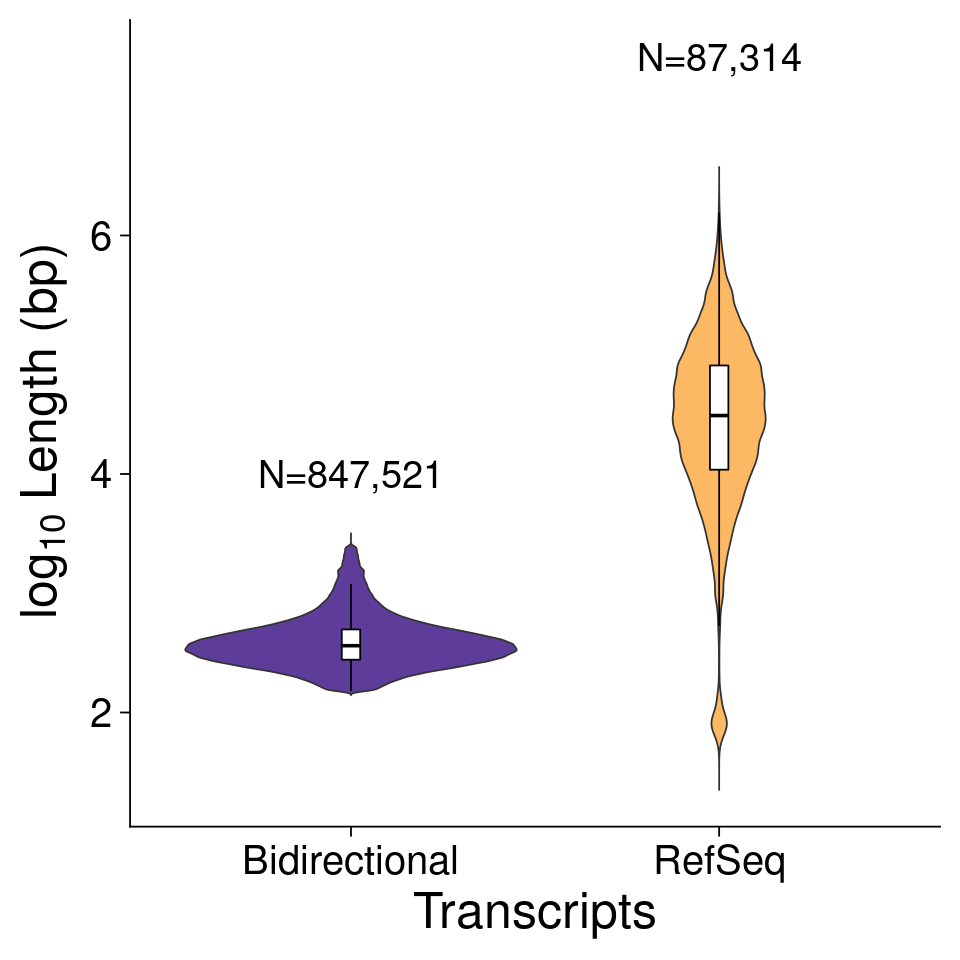

In [15]:
options(repr.plot.width=8, repr.plot.height=8)
hg38_lengths <- ggplot(hg38_transcripts, aes(x=type, 
                          y=log(width, base=10),
                         fill=type)) + 
    geom_violin(trim=FALSE) +
ylab(expression(paste(log[10]," Length (bp)", sep=' ')) )+
xlab('Transcripts') + 
geom_boxplot(width=0.05, 
             fill='white',
             color='black', 
             alpha=1, 
             outlier.size=-1,
             position = position_dodge(0.9)) + 
scale_fill_manual(name=' ',
                  values = c("#5e3c99","#fdb863"),
                 labels = c("Bidirectional","RefSeq")) +
annotate("text", x=c(1,2), y=c(4,7.5), label= c("N=847,521","N=87,314"), size = 8) + 
theme_cowplot(24) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 34), 
      axis.title = element_text(size = 30), 
      axis.text.x = element_text(size = 24),
      axis.text.y = element_text(size = 24),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24),
     legend.position = "none") 

hg38_lengths

In [16]:
dim(hg38_bidirs)
dim(hg38_refseq)

[1] 847521      8

[1] 87314     8

In [17]:
ggsave(hg38_lengths, width = 8, height = 8,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/hg38_transcript_lengths.pdf", 
       bg = "transparent")

ggsave(hg38_lengths, width = 8, height = 8,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/hg38_transcript_lengths.png", 
       bg = "transparent")

### mm10

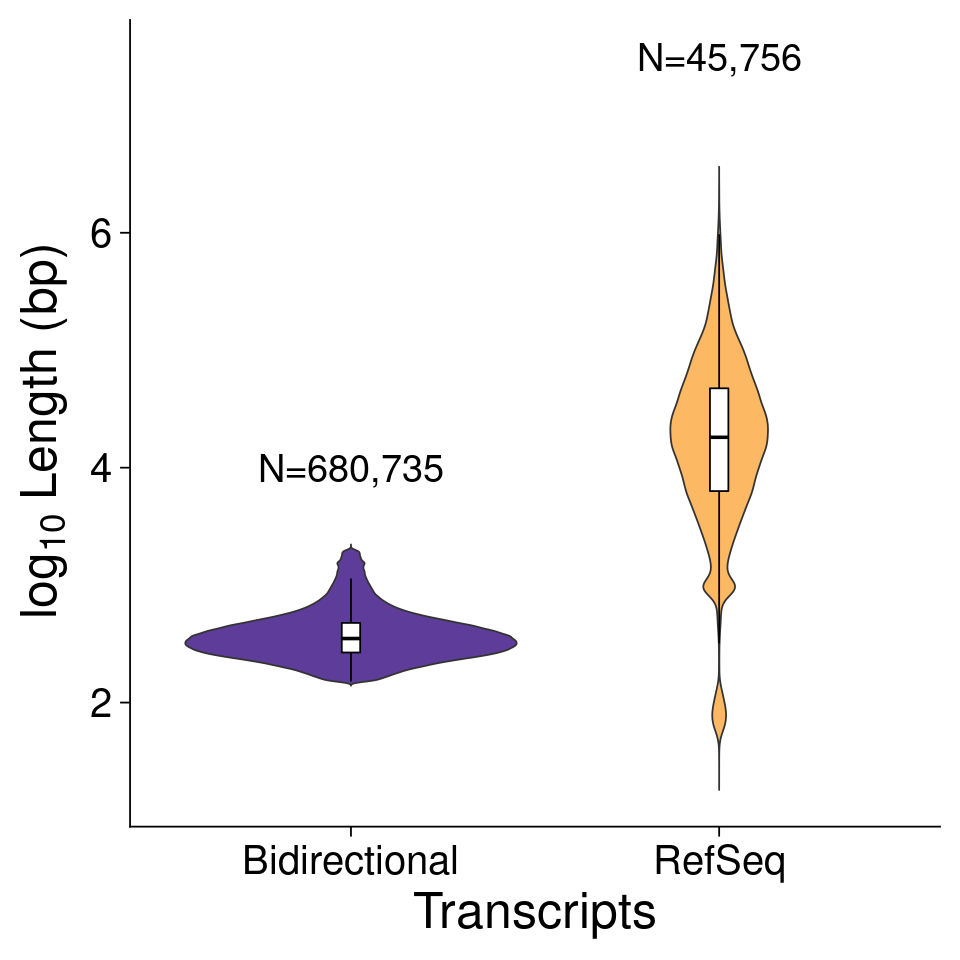

In [18]:
options(repr.plot.width=8, repr.plot.height=8)
mm10_lengths <- ggplot(mm10_transcripts, aes(x=type, 
                          y=log(width, base=10),
                         fill=type)) + 
    geom_violin(trim=FALSE) +
ylab(expression(paste(log[10]," Length (bp)", sep=' ')) )+
xlab('Transcripts') + 
geom_boxplot(width=0.05, 
             fill='white',
             color='black', 
             alpha=1, 
             outlier.size=-1,
             position = position_dodge(0.9)) + 
scale_fill_manual(name=' ',
                  values = c("#5e3c99","#fdb863"),
                 labels = c("Bidirectional","RefSeq")) +
annotate("text", x=c(1,2), y=c(4,7.5), label= c("N=680,735","N=45,756"), size = 8) + 
theme_cowplot(24) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 34), 
      axis.title = element_text(size = 30), 
      axis.text.x = element_text(size = 24),
      axis.text.y = element_text(size = 24),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24),
     legend.position = "none") 

mm10_lengths

In [19]:
dim(mm10_bidirs)
dim(mm10_refseq)

[1] 680735      8

[1] 45756     8

In [20]:
ggsave(mm10_lengths, width = 8, height = 8,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/mm10/paper_figures/mm10_transcript_lengths.pdf", 
       bg = "transparent")

ggsave(mm10_lengths, width = 8, height = 8,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/mm10/paper_figures/mm10_transcript_lengths.png", 
       bg = "transparent")

## Overlaps

In [21]:
genome_overlap_nrow <- as.numeric(lapply(genome_overlap_DT, nrow))
genome_overlap_nrow

[1]   99481   38380   31344  399047  399047  322329  319058  318363  322329
[10]  322329  482632  459907  450557 2406992 2406992   33365   26728   22425
[19]   95469   95469   79511   31087   25467  164219  164219  289376  286219
[28]  285572  289376  289376  350863  330705  323918  815730  815730   28929
[37]   22605   18476   50187   50187

In [22]:
basenames <- as.character(lapply(genome_overlap_path, base::basename))
basenames

[1] "hg38_refseq_exons.bed.mumerge_overlap.bed"                 
 [2] "hg38_refseq_exons.bed.mumerge_overlap50perc.bed"           
 [3] "hg38_refseq_exons.bed.mumerge_overlap60perc.bed"           
 [4] "hg38_refseq_exons.bed.mumerge_overlapReportAll_bp.bed"     
 [5] "hg38_refseq_exons.bed.mumerge_overlapReportAll.bed"        
 [6] "hg38_refseq_intergenic.bed.mumerge_overlap.bed"            
 [7] "hg38_refseq_intergenic.bed.mumerge_overlap50perc.bed"      
 [8] "hg38_refseq_intergenic.bed.mumerge_overlap60perc.bed"      
 [9] "hg38_refseq_intergenic.bed.mumerge_overlapReportAll_bp.bed"
[10] "hg38_refseq_intergenic.bed.mumerge_overlapReportAll.bed"   
[11] "hg38_refseq_introns.bed.mumerge_overlap.bed"               
[12] "hg38_refseq_introns.bed.mumerge_overlap50perc.bed"         
[13] "hg38_refseq_introns.bed.mumerge_overlap60perc.bed"         
[14] "hg38_refseq_introns.bed.mumerge_overlapReportAll_bp.bed"   
[15] "hg38_refseq_introns.bed.mumerge_overlapReportAll.bed"      
[16] "hg38_refseq_promoters.bed.mumerge_overlap.bed"             
[17] "hg38_refseq_promoters.bed.mumerge_overlap50perc.bed"       
[18] "hg38_refseq_promoters.bed.mumerge_overlap60perc.bed"       
[19] "hg38_refseq_promoters.bed.mumerge_overlapReportAll_bp.bed" 
[20] "hg38_refseq_promoters.bed.mumerge_overlapReportAll.bed"    
[21] "mm10_refseq_exons.bed.mumerge_overlap.bed"                 
[22] "mm10_refseq_exons.bed.mumerge_overlap50perc.bed"           
[23] "mm10_refseq_exons.bed.mumerge_overlap60perc.bed"           
[24] "mm10_refseq_exons.bed.mumerge_overlapReportAll_bp.bed"     
[25] "mm10_refseq_exons.bed.mumerge_overlapReportAll.bed"        
[26] "mm10_refseq_intergenic.bed.mumerge_overlap.bed"            
[27] "mm10_refseq_intergenic.bed.mumerge_overlap50perc.bed"      
[28] "mm10_refseq_intergenic.bed.mumerge_overlap60perc.bed"      
[29] "mm10_refseq_intergenic.bed.mumerge_overlapReportAll_bp.bed"
[30] "mm10_refseq_intergenic.bed.mumerge_overlapReportAll.bed"   
[31] "mm10_refseq_introns.bed.mumerge_overlap.bed"               
[32] "mm10_refseq_introns.bed.mumerge_overlap50perc.bed"         
[33] "mm10_refseq_introns.bed.mumerge_overlap60perc.bed"         
[34] "mm10_refseq_introns.bed.mumerge_overlapReportAll_bp.bed"   
[35] "mm10_refseq_introns.bed.mumerge_overlapReportAll.bed"      
[36] "mm10_refseq_promoters.bed.mumerge_overlap.bed"             
[37] "mm10_refseq_promoters.bed.mumerge_overlap50perc.bed"       
[38] "mm10_refseq_promoters.bed.mumerge_overlap60perc.bed"       
[39] "mm10_refseq_promoters.bed.mumerge_overlapReportAll_bp.bed" 
[40] "mm10_refseq_promoters.bed.mumerge_overlapReportAll.bed"

In [23]:
genome <- as.character(lapply(strsplit(as.character(basenames), '_'), `[`, 1))
feature <- as.character(lapply(strsplit(as.character(lapply(strsplit(as.character(basenames), '_'), `[`, 3)),'\\.'), `[`,1))
overlap_type <- rep(c('1E-9','0.5','0.6','All Reported','All Reported bd'), 4)
bidir_counts <- rep(c(847521, 680735), 1, each = 20) #16


In [24]:
genome_overlap_summary <- data.frame(genome,
                                     feature, 
                                     overlap_type, 
                                     genome_overlap_nrow, 
                                     bidir_counts)
genome_overlap_summary

genome,feature,overlap_type,genome_overlap_nrow,bidir_counts
<fct>,<fct>,<fct>,<dbl>,<dbl>
hg38,exons,1E-9,99481,847521
hg38,exons,0.5,38380,847521
hg38,exons,0.6,31344,847521
hg38,exons,All Reported,399047,847521
hg38,exons,All Reported bd,399047,847521
hg38,intergenic,1E-9,322329,847521
hg38,intergenic,0.5,319058,847521
hg38,intergenic,0.6,318363,847521
hg38,intergenic,All Reported,322329,847521


In [25]:
genome_overlap_summary_perc <- subset(genome_overlap_summary,
                                      overlap_type != "All Reported" & 
                                     overlap_type != "All Reported bd")
genome_overlap_summary_perc$genome_overlap_per <- (genome_overlap_summary_perc$genome_overlap_nrow/genome_overlap_summary_perc$bidir_counts)*100
genome_overlap_summary_perc


,genome,feature,overlap_type,genome_overlap_nrow,bidir_counts,genome_overlap_per
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,hg38,exons,1E-9,99481,847521,11.737880
2,hg38,exons,0.5,38380,847521,4.528501
3,hg38,exons,0.6,31344,847521,3.698315
6,hg38,intergenic,1E-9,322329,847521,38.031978
7,hg38,intergenic,0.5,319058,847521,37.646029
8,hg38,intergenic,0.6,318363,847521,37.564025
11,hg38,introns,1E-9,482632,847521,56.946318
12,hg38,introns,0.5,459907,847521,54.264968
13,hg38,introns,0.6,450557,847521,53.161751


In [26]:
genome_overlap_summary_perc <- subset(genome_overlap_summary_perc,
                                       feature!='Transcript' &
                                      overlap_type=='0.5')
genome_overlap_summary_perc$feature <- factor(genome_overlap_summary_perc$feature, 
                                               levels = c("promoters","exons", "intergenic", "introns"))
genome_overlap_summary_perc

,genome,feature,overlap_type,genome_overlap_nrow,bidir_counts,genome_overlap_per
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
2,hg38,exons,0.5,38380,847521,4.528501
7,hg38,intergenic,0.5,319058,847521,37.646029
12,hg38,introns,0.5,459907,847521,54.264968
17,hg38,promoters,0.5,26728,847521,3.153668
22,mm10,exons,0.5,31087,680735,4.566682
27,mm10,intergenic,0.5,286219,680735,42.045583
32,mm10,introns,0.5,330705,680735,48.580578
37,mm10,promoters,0.5,22605,680735,3.320675


In [27]:
genome_overlap_summary_perc_order <- with(genome_overlap_summary_perc, 
                                           genome_overlap_summary_perc[order(feature),])
genome_overlap_summary_perc_order

,genome,feature,overlap_type,genome_overlap_nrow,bidir_counts,genome_overlap_per
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
17,hg38,promoters,0.5,26728,847521,3.153668
37,mm10,promoters,0.5,22605,680735,3.320675
2,hg38,exons,0.5,38380,847521,4.528501
22,mm10,exons,0.5,31087,680735,4.566682
7,hg38,intergenic,0.5,319058,847521,37.646029
27,mm10,intergenic,0.5,286219,680735,42.045583
12,hg38,introns,0.5,459907,847521,54.264968
32,mm10,introns,0.5,330705,680735,48.580578


In [28]:
#format(big_number, scientific = FALSE, big.mark = ',')
format(subset(genome_overlap_summary_perc_order,
                       genome=="hg38")$genome_overlap_nrow, 
       scientific = FALSE, big.mark = ',')

[1] " 26,728" " 38,380" "319,058" "459,907"

In [29]:
options(repr.plot.width=12, repr.plot.height=8)

bidir_overlap_hg38 <- ggplot2::ggplot(subset(genome_overlap_summary_perc_order,
                                             genome=="hg38"),
       aes(x=feature, y=as.numeric(genome_overlap_per))) +
geom_bar(stat="identity", width=0.7, color='black',fill="gray65")+
  scale_y_continuous(expand = c(0, 0)) +
labs(title="Human Bidirectionals",
     x="Feature", 
     y = "% Overlap")+
annotate("text", x=c(1,2,3,4),
         y=c(6,8,41,57), 
         label= paste("N =", format(subset(genome_overlap_summary_perc_order,
                       genome=="hg38")$genome_overlap_nrow, 
       scientific = FALSE, big.mark = ',')), size = 8) + 
theme_cowplot(24) +
coord_cartesian(ylim=c(0, 60)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 30), 
      axis.title = element_text(size = 30), 
      axis.text = element_text(size = 24),
     axis.text.x = element_text(size = 24),
     legend.position="none") 


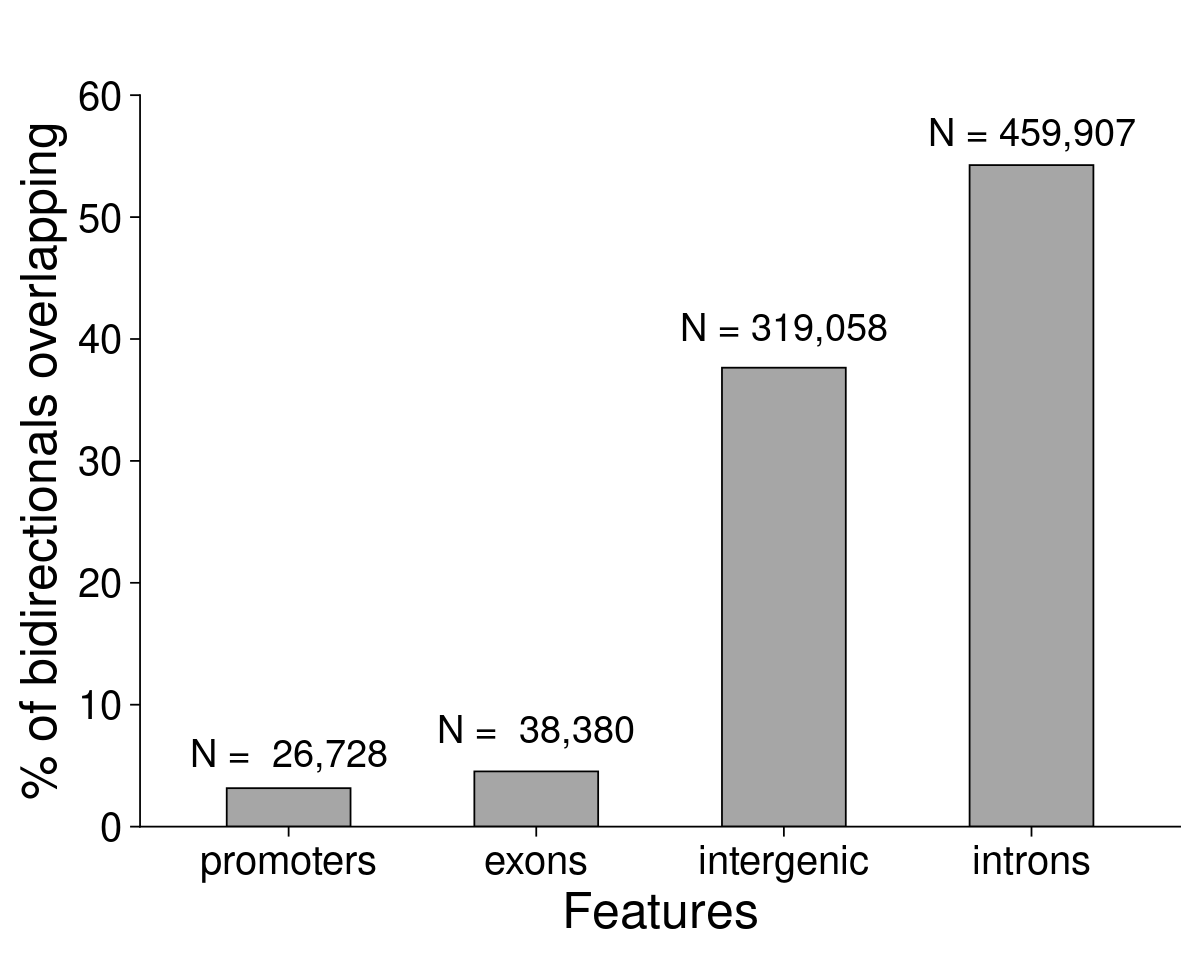

In [30]:
options(repr.plot.width=10, repr.plot.height=8)

bidir_overlap_hg38_noheader <- ggplot2::ggplot(subset(genome_overlap_summary_perc_order,genome=="hg38"),
       aes(x=feature, y=as.numeric(genome_overlap_per))) +
geom_bar(stat="identity", width=0.5, color='black',fill="gray65")+
  scale_y_continuous(expand = c(0, 0)) +
labs(title=" ",
     x="Features", 
     y = "% of bidirectionals overlapping")+
annotate("text", x=c(1,2,3,4),
         y=c(6,8,41,57), 
         label= paste("N =", format(subset(genome_overlap_summary_perc_order,
                       genome=="hg38")$genome_overlap_nrow, 
       scientific = FALSE, big.mark = ',')), size = 8) + 
theme_cowplot(24) +
coord_cartesian(ylim=c(0, 60)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 30), 
      axis.title = element_text(size = 30), 
      axis.text = element_text(size = 24),
     axis.text.x = element_text(size = 24),
     legend.position="none") 

bidir_overlap_hg38_noheader

In [31]:
ggsave(bidir_overlap_hg38_noheader, width = 10, height = 8,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/hg38_refseq_overlap_with_dbnascent.pdf", 
       bg = "transparent")

ggsave(bidir_overlap_hg38_noheader, width = 10, height = 8,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/hg38_refseq_overlap_with_dbnascent.png", 
       bg = "transparent")

In [32]:
options(repr.plot.width=12, repr.plot.height=8)

bidir_overlap_mm10 <- ggplot2::ggplot(subset(genome_overlap_summary_perc_order,genome=="mm10"),
       aes(x=feature, y=as.numeric(genome_overlap_per))) +
geom_bar(stat="identity", width=0.7, color='black',fill="gray65")+
  scale_y_continuous(expand = c(0, 0)) +
labs(title="Mouse Bidirectionals",
     x="Feature", 
     y = "% Overlap")+
annotate("text", x=c(1,2,3,4),
         y=c(6,8,45,51), 
         label= paste("N =", format(subset(genome_overlap_summary_perc_order,
                       genome=="mm10")$genome_overlap_nrow, 
       scientific = FALSE, big.mark = ',')), size = 8) + 
theme_cowplot(24) +
coord_cartesian(ylim=c(0, 55)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 30), 
      axis.title = element_text(size = 30), 
      axis.text = element_text(size = 24),
     axis.text.x = element_text(size = 24),
     legend.position="none") 


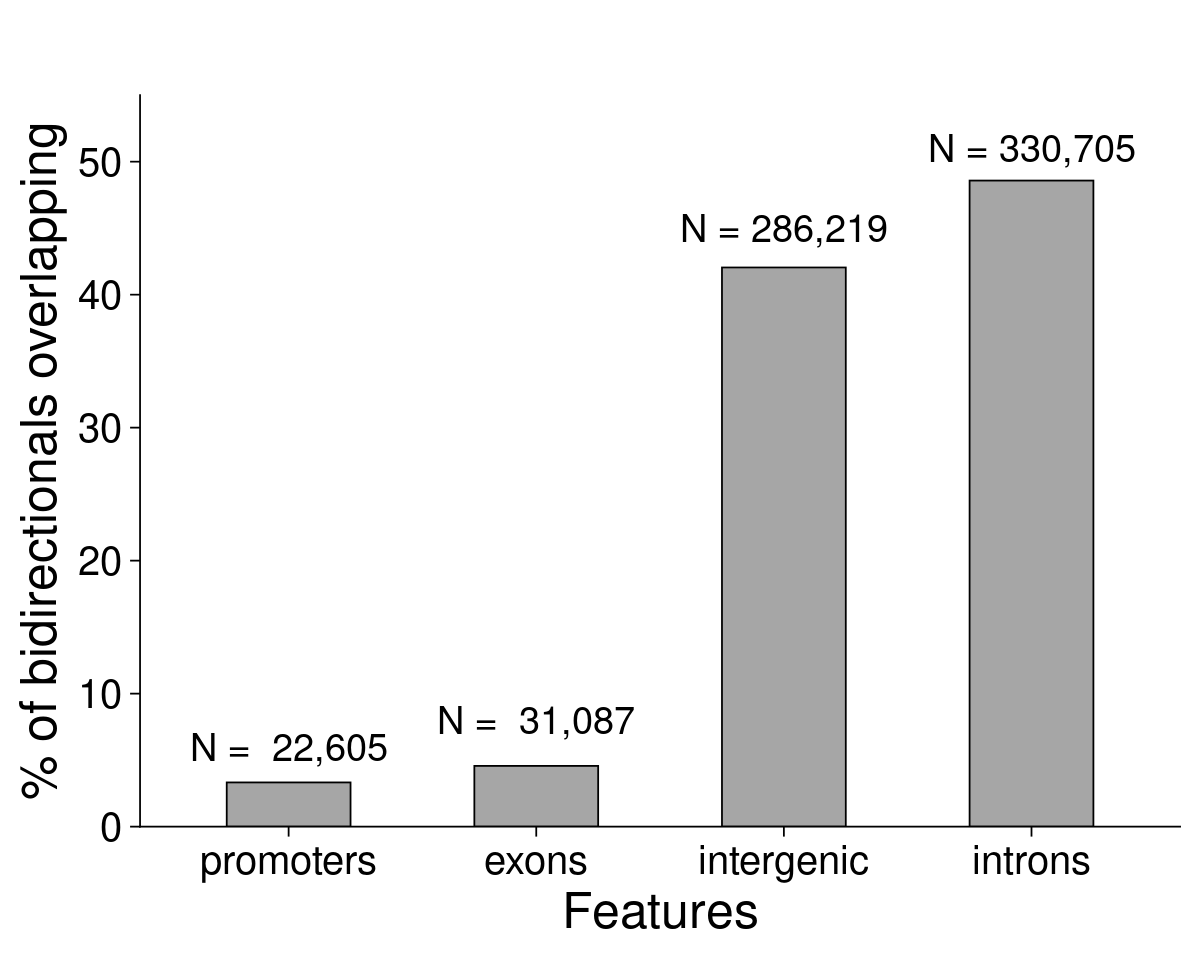

In [33]:
options(repr.plot.width=10, repr.plot.height=8)

bidir_overlap_mm10_noheader <- ggplot2::ggplot(subset(genome_overlap_summary_perc,genome=="mm10"),
       aes(x=feature, y=as.numeric(genome_overlap_per))) +
geom_bar(stat="identity", width=0.5, color='black',fill="gray65")+
  scale_y_continuous(expand = c(0, 0)) +
labs(title=" ",
     x="Features", 
     y = "% of bidirectionals overlapping")+
annotate("text", x=c(1,2,3,4),
         y=c(6,8,45,51), 
         label= paste("N =", format(subset(genome_overlap_summary_perc_order,
                       genome=="mm10")$genome_overlap_nrow, 
       scientific = FALSE, big.mark = ',')), size = 8) +
theme_cowplot(24) +
coord_cartesian(ylim=c(0, 55)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 30), 
      axis.title = element_text(size = 30), 
      axis.text = element_text(size = 24)) 

bidir_overlap_mm10_noheader

In [34]:
ggsave(bidir_overlap_mm10_noheader, width = 10, height = 8,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/mm10/paper_figures/mm10_refseq_overlap_with_dbnascent.pdf", 
       bg = "transparent")

ggsave(bidir_overlap_mm10_noheader, width = 10, height = 8,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/mm10/paper_figures/mm10_refseq_overlap_with_dbnascent.png", 
       bg = "transparent")

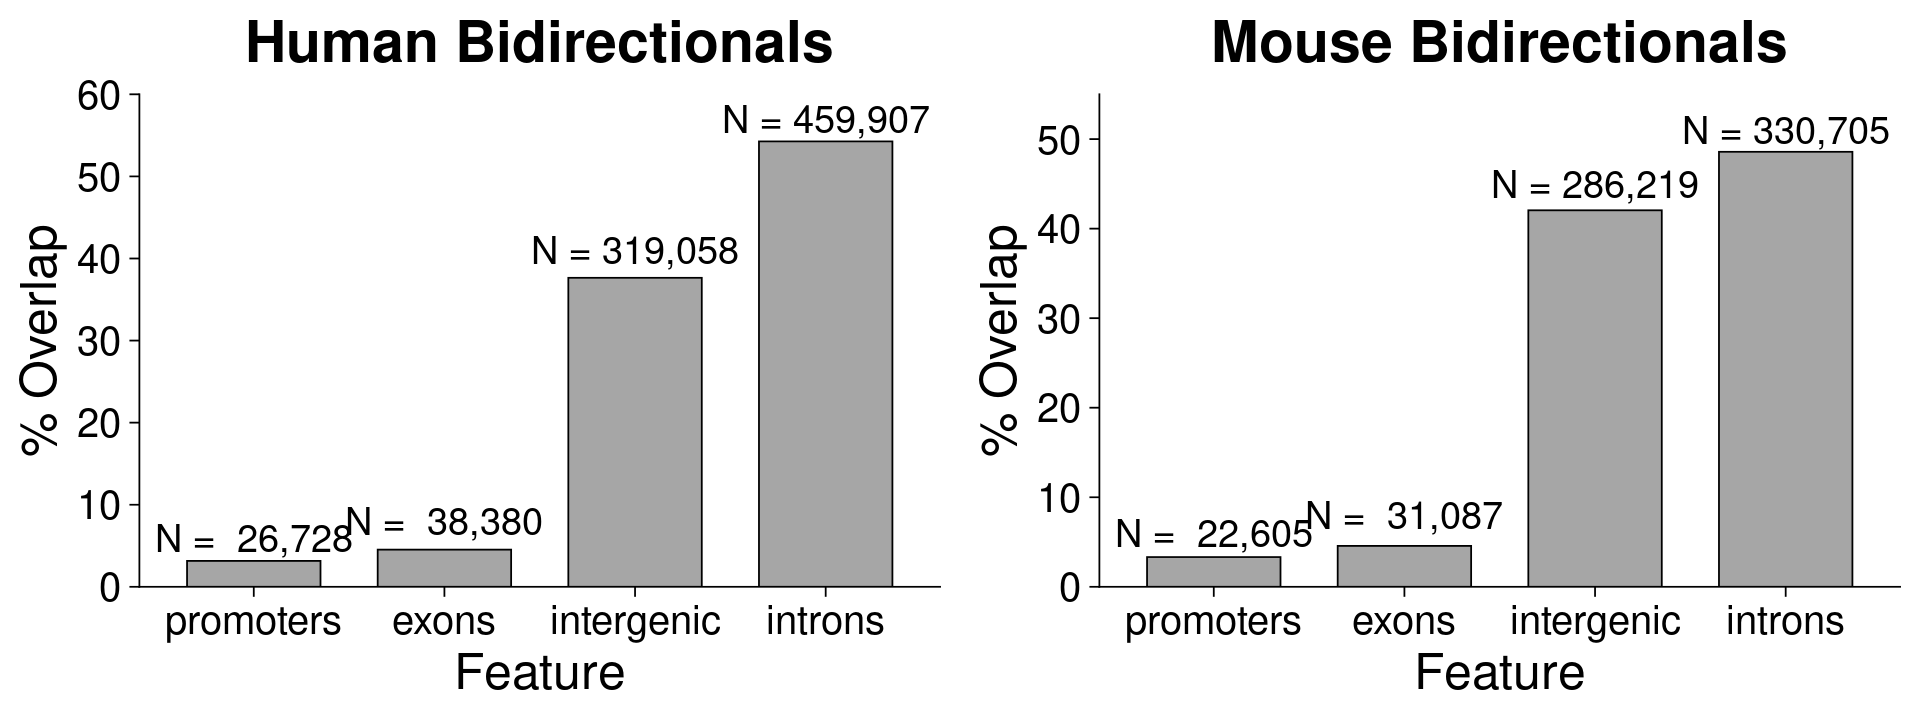

In [35]:
options(repr.plot.width=16, repr.plot.height=6)

plot_grid(bidir_overlap_hg38, bidir_overlap_mm10)


# Session Information

In [61]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] VennDiagram_1.7.3   futile.logger_1.4.3 ggvenn_0.1.9       
[4] dplyr_1.0.10        scales_1.2.1        cowplot_1.1.1      
[7] ggplot2_3.3.6       data.table_1.14.2  

loaded via a namespace (and not attached):
 [1] formatR_1.12         pillar_1.8.1         compiler_3.6.0      
 [4] futile.options_1.0.1 base64enc_0